In [38]:
### Librerías

library(dplyr)
library(ggplot2)
library(readr)
library(readxl)
library(agricolae)
library(modeest)
library(moments)

In [14]:
datos  <- read_excel("/home/isaacmgz/Escritorio/Grupo1.xlsx")
names(datos)
head(datos)

[1] "MUESTRA"            "id"                 "Nombre_app"        
 [4] "tamaño_bytes"       "Paises"             "precio"            
 [7] "calificación"       "calificación-nueva" "restricción"       
[10] "género"             "disp_soporte"       "capt_pantalla"     
[13] "idiomas_sopor"

MUESTRA,id,Nombre_app,tamaño_bytes,Paises,precio,calificación,calificación-nueva,restricción,género,disp_soporte,capt_pantalla,idiomas_sopor
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
197,328205875,Monkey Preschool Lunchbox,229272576,USA,1.99,4,3.5,4+,Games,38,5,1
237,336141475,mmm,204959744,Francia,0,3.5,0,12+,Entertainment,38,0,2
343,359891723,ESPN Tournament Challenge,69057536,Korea,0,4,4,4+,Sports,37,5,1
329,355524910,Worms 2: Armageddon,529755136,Korea,4.99,4.5,4.5,12+,Games,40,5,1
164,320300350,Virtual Families,27746273,Francia,1.99,3.5,4.5,9+,Games,47,0,1
244,336689375,TeachMe: Kindergarten,59846656,Korea,1.99,4,4,4+,Education,37,5,1


1. Construir una tabla de frecuencias para datos simples que le permita describir como es el comporta-
miento la calificación de las aplicaciones ¿qué se puede concluir?

In [5]:
#head(datos)
#tabla de frecuencias para datos simples
tdfs <- function(Variable){# Los datos deben de estar guardados en un vector
  tabla1 <- as.data.frame(table(Variable))
  tabla1 <- transform(tabla1, Ni = cumsum(Freq), fi = round(prop.table(Freq), 4))
  tabla1 <- transform(tabla1, Fi = cumsum(fi))
  tabla1
}

In [6]:
tdfs(datos$`calificación`); tdfs(datos$`calificación-nueva`)

Variable,Freq,Ni,fi,Fi
<fct>,<int>,<int>,<dbl>,<dbl>
0,1,1,0.004,0.004
2,3,4,0.012,0.016
2.5,8,12,0.032,0.048
3,29,41,0.116,0.164
3.5,61,102,0.244,0.408
4,90,192,0.360,0.768
4.5,57,249,0.228,0.996
5,1,250,0.004,1.000


Variable,Freq,Ni,fi,Fi
<fct>,<int>,<int>,<dbl>,<dbl>
0,29,29,0.116,0.116
1,3,32,0.012,0.128
1.5,1,33,0.004,0.132
2,10,43,0.040,0.172
2.5,19,62,0.076,0.248
3,11,73,0.044,0.292
3.5,19,92,0.076,0.368
4,46,138,0.184,0.552
4.5,63,201,0.252,0.804


2. Construya un gráfico con el que pueda explicar la frecuencia de las calificaciones nuevas sobre las
diferentes aplicaciones. Explique los resultados.

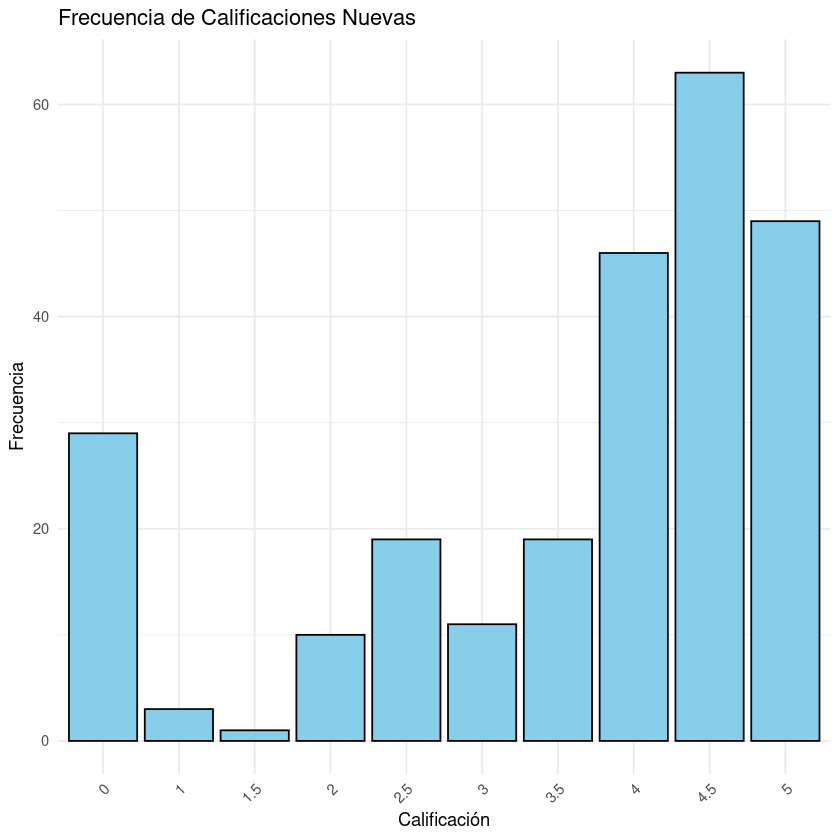

In [7]:
df  <- data.frame(
  calificacion = c(0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5),
  frecuencia = c(29, 3, 1, 10, 19, 11, 19, 46, 63, 49)
)

ggplot(df, aes(x = factor(calificacion), y = frecuencia)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Frecuencia de Calificaciones Nuevas",
       x = "Calificación",
       y = "Frecuencia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

3. Construir una tabla de frecuencias para datos agrupados que le permita describir el tamaño de las
aplicaciones. ¿qué se puede concluir?

In [8]:
tam_b <- c(datos$`tamaño_bytes`) 

k_ <- ceiling(1 + 3.322 * log10(length(tam_b)))
ran <- max(tam_b) - min(tam_b)
amp <- ran / k_

li <- min(tam_b)
ls <- max(tam_b)

lista_tam <- hist(tam_b, breaks = k_, plot = FALSE)

tablaf  <- table.freq(lista_tam)
tablaf; lista_tam

Lower,Upper,Main,Frequency,Percentage,CF,CPF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0e+00,1e+08,5.0e+07,153,61.2,153,61.2
1e+08,2e+08,1.5e+08,73,29.2,226,90.4
2e+08,3e+08,2.5e+08,17,6.8,243,97.2
3e+08,4e+08,3.5e+08,2,0.8,245,98.0
4e+08,5e+08,4.5e+08,1,0.4,246,98.4
5e+08,6e+08,5.5e+08,2,0.8,248,99.2
6e+08,7e+08,6.5e+08,0,0.0,248,99.2
7e+08,8e+08,7.5e+08,1,0.4,249,99.6
8e+08,9e+08,8.5e+08,1,0.4,250,100.0


$breaks
 [1] 0e+00 1e+08 2e+08 3e+08 4e+08 5e+08 6e+08 7e+08 8e+08 9e+08

$counts
[1] 153  73  17   2   1   2   0   1   1

$density
[1] 6.12e-09 2.92e-09 6.80e-10 8.00e-11 4.00e-11 8.00e-11 0.00e+00 4.00e-11
[9] 4.00e-11

$mids
[1] 5.0e+07 1.5e+08 2.5e+08 3.5e+08 4.5e+08 5.5e+08 6.5e+08 7.5e+08 8.5e+08

$xname
[1] "tam_b"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

In [9]:
tdfA <- function(y) {# Los datos deben de estar guardados en un vector
  # Calculamos el número de clases usando la fórmula de Sturge
  k <- nclass.Sturges(y)
  
  # Formamos los intervalos de clase
  intervalos <- cut(y, breaks = k)
  
  # Tabla de frecuencias absolutas
  tabla2 <- as.data.frame(table(intervalos))
  
  # Añadimos frecuencias acumuladas y frecuencias relativas
  tabla2 <- transform(tabla2, Ni = cumsum(Freq), fi = round(prop.table(Freq), 4))
  
  # Añadimos frecuencias relativas acumuladas 
  tabla2 <- transform(tabla2, Fi = cumsum(fi))
  
  # Para obtener los puntos medios de los intervalos de clase, usaremos 
  midpoints <- function(x, dp=2){
    lower <- as.numeric(gsub(',.*','',gsub('\\(|\\[|\\)|\\]','', x)))
    upper <- as.numeric(gsub('.*,','',gsub('\\(|\\[|\\)|\\]','', x)))
    return(round(lower+(upper-lower)/2, dp))
  }
  # Agregamos la columna de puntos medios de los intervalos de clase                                 
  tabla2 <- transform(tabla2, MC = midpoints(intervalos))
  
  tabla2
} 

tdfA(tam_b)

intervalos,Freq,Ni,fi,Fi,MC
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
"(-1.11e+05,9.83e+07]",152,152,0.608,0.608,49094500
"(9.83e+07,1.96e+08]",73,225,0.292,0.900,147150000
"(1.96e+08,2.93e+08]",18,243,0.072,0.972,244500000
"(2.93e+08,3.91e+08]",2,245,0.008,0.980,342000000
"(3.91e+08,4.89e+08]",1,246,0.004,0.984,440000000
"(4.89e+08,5.86e+08]",2,248,0.008,0.992,537500000
"(5.86e+08,6.84e+08]",0,248,0.000,0.992,635000000
"(6.84e+08,7.81e+08]",1,249,0.004,0.996,732500000
"(7.81e+08,8.8e+08]",1,250,0.004,1.000,830500000


4. Determine las medidas de tendencia central, de dispersión, asimetrı́a y curtosis y escriba un párrafo
donde integre la información recolectada en el contexto de la variable precio de la aplicación.

In [10]:
prec_app  <- as.numeric(datos$`precio`)

media_prec  <- mean(prec_app)
mediana_prec  <- median(prec_app)
moda_prec  <- mfv(prec_app)

cat('Media:', media_prec, ', Mediana:', mediana_prec, ', Moda:', moda_prec, '\n')

varianza_prec  <- var(prec_app)
desviacion_prec  <- sd(prec_app)
coef_dispercion_prec  <- desviacion_prec / media_prec

cat('Varianza:', varianza_prec, ', Desviación:', desviacion_prec, ', Coef Disperción:', coef_dispercion_prec, '\n')

simetria_prec <- skewness(prec_app) 
curtosis_prec <- kurtosis(prec_app) 

cat('Simetría:', simetria_prec,', Curtosis:', curtosis_prec)

Media: 3.15428 , Mediana: 0.99 , Moda: 0 
Varianza: 274.9833 , Desviación: 16.58262 , Coef Disperción: 5.257181 
Simetría: 13.60832 , Curtosis: 199.3851

5. Halle el tamaño de las aplicaciones por captura de pantallas y presente un gráfico donde se exhiba
cual es la cantidad de capturas asociadas a los mayores y menores tamaños, además determine en
cual cantidad de capturas hay mayor variabildad con respecto al tamaño de las aplicaciones.

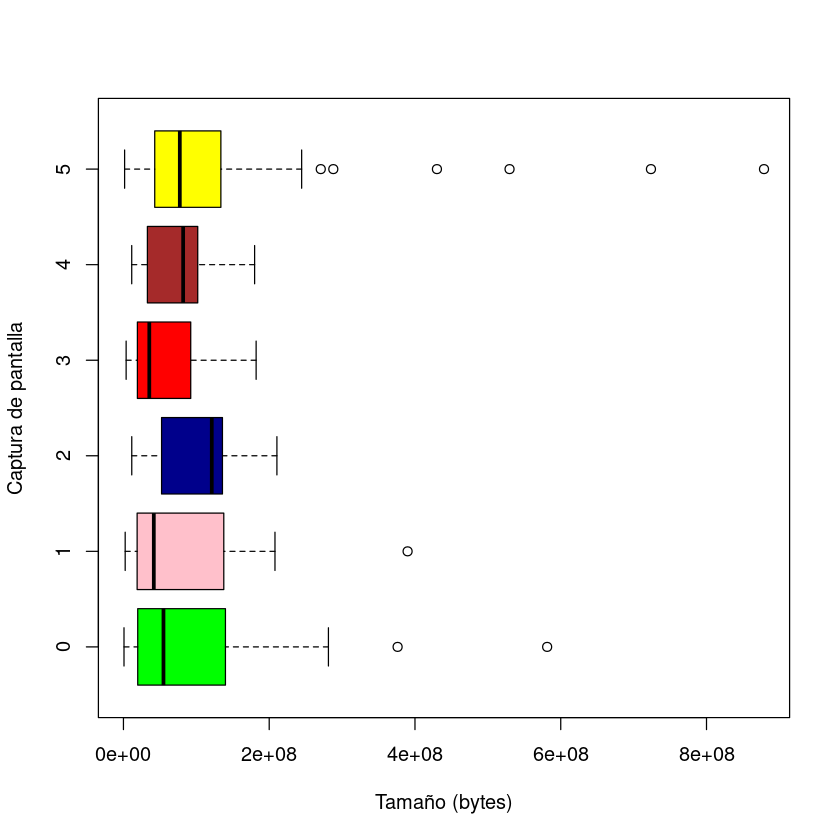

In [13]:
boxplot(datos$`tamaño_bytes` ~ datos$capt_pantalla, 
        xlab = 'Tamaño (bytes)', horizontal = TRUE, ylab= 'Captura de pantalla', col=c('green', 'pink', 'darkblue', 'red','brown', 'yellow'))

6. Para las aplicaciones que permiten soporta 37 dispositivos, se cree que los géneros Medical y Book
son las menos producidas y la de género Travel es la mas producida, ¿son ciertas las afirmaciones?

7. Construya un gráfico donde se pueda determinar la proporción de capturas permitidas para las
aplicaciones creadas en Korea. ¿cuales son las cantidades de capturas con mayor y menor proporción?


 0  1  2  3  4  5 
21  7  4  6 10 52 

[1] "Captura con mayor proporción: 5"
[1] "Captura con menor proporción: 2"


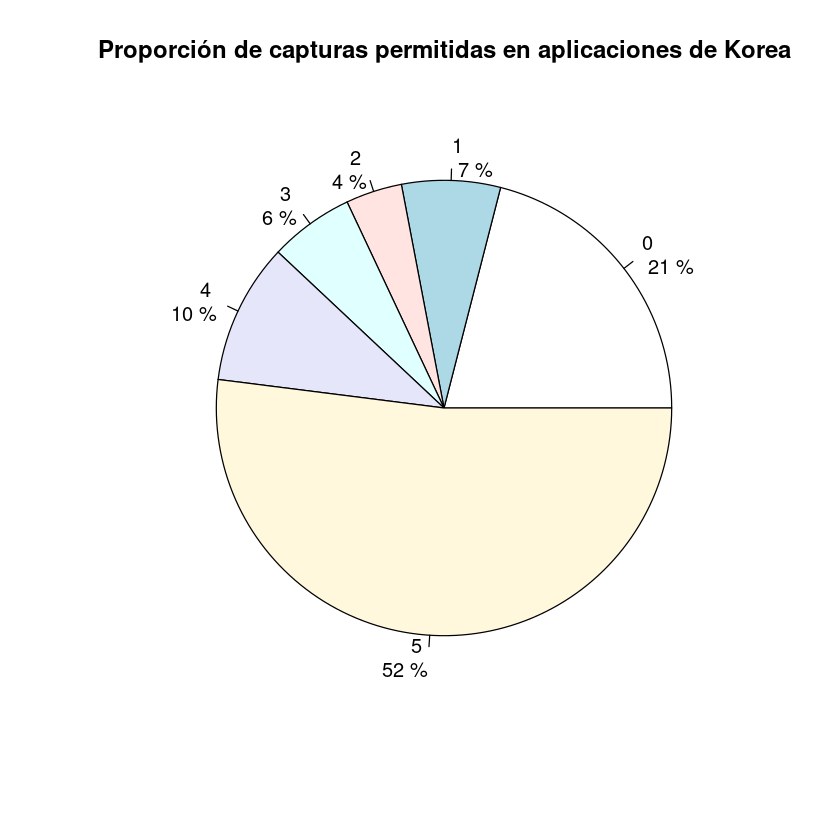

In [22]:
dat_korea <- datos[datos$`Paises` == 'Korea',]

tabla_cap <- table(dat_korea$capt_pantalla)
tabla_cap

porcentajes <- prop.table(tabla_cap) * 100

# Crear el gráfico de pastel
pie(tabla_cap, 
    labels = paste(names(tabla_cap), "\n", round(porcentajes, 1), "%"),
    main = "Proporción de capturas permitidas en aplicaciones de Korea")

# Para encontrar las cantidades con mayor y menor proporción
max_prop <- names(which.max(tabla_cap))
min_prop <- names(which.min(tabla_cap))

print(paste("Captura con mayor proporción:", max_prop))
print(paste("Captura con menor proporción:", min_prop))

8. En las aplicaciones con restricción 12+, ¿cuál es el precio medio? ¿es este precio significativamente
menor que en las aplicaciones con resticción 17+ o mayor?

In [51]:
apps_12p <- datos[datos$restricción == "12+", ]
prom_12p <- mean(as.numeric(apps_12p$precio))
print(paste("Precio medio de aplicaciones 12+:", round(prom_12p, 2)))

apps_17p <- datos[datos$restricción == "17+", ]
prom_17p <- mean(as.numeric(apps_17p$precio))

print(paste("Precio medio de aplicaciones 17+ o mayor:", round(prom_17p, 2)))

result_t <- t.test(as.numeric(apps_12p$precio), as.numeric(apps_17p$precio))

print(result_t)

dif_p <- abs(prom_17p - prom_12p) / prom_12p * 100

print(paste("Diferencia porcentual:", round(dif_p, 2), "%"))

[1] "Precio medio de aplicaciones 12+: 1.45"
[1] "Precio medio de aplicaciones 17+ o mayor: 1.26"

	Welch Two Sample t-test

data:  as.numeric(apps_12p$precio) and as.numeric(apps_17p$precio)
t = 0.3686, df = 54.309, p-value = 0.7139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8803488  1.2770351
sample estimates:
mean of x mean of y 
 1.454865  1.256522 

[1] "Diferencia porcentual: 13.63 %"


9. Construya una tabla de contingencia con la que pueda determinar: el paı́s que produce mayor cantidad
de aplicaciones Games con restricciones 4+ y la cantidad producida, además, el paı́s que produce
menor cantidad de aplicaciones Photo & Video con restricciones 4+ y la cantidad producida.

In [58]:
# Tabla de contingencia paises, género y restricción

tabla_cont <- table(datos$Paises, datos$género, datos$restricción)

# Filtrar para Games con restricción 4+
games_4p <- tabla_cont[, "Games", "4+"]

# Filtrar para Photo & Video con restricción 4+
phvid_4p <- tabla_cont[, "Photo & Video", "4+"]

# País con más aplicaciones Games 4+
pais_max_games <- names(which.max(games_4p))
max_games <- max(games_4p)

# Encontrar el país con menos aplicaciones Photo & Video 4+
pais_min_photo <- names(which.min(phvid_4p))
min_photo <- min(phvid_4p)

print(paste("País con más aplicaciones Games 4+:", pais_max_games))
print(paste("Cantidad de aplicaciones Games 4+:", max_games))
print(paste("País con menos aplicaciones Photo & Video 4+:", pais_min_photo))
print(paste("Cantidad de aplicaciones Photo & Video 4+:", min_photo))

[1] "País con más aplicaciones Games 4+: USA"
[1] "Cantidad de aplicaciones Games 4+: 17"
[1] "País con menos aplicaciones Photo & Video 4+: China"
[1] "Cantidad de aplicaciones Photo & Video 4+: 1"


In [59]:
tabla_cont

, ,  = 12+

         
          Book Business Education Entertainment Finance Food & Drink Games
  China      0        0         0             2       0            0     0
  Francia    0        0         0             1       0            0     1
  Korea      0        0         0             2       0            0     3
  USA        0        0         0             0       0            1     5
         
          Health & Fitness Lifestyle Medical Music Navigation News
  China                  2         0       0     1          0    2
  Francia                2         0       0     2          0    3
  Korea                  0         0       0     0          0    2
  USA                    0         1       0     0          0    2
         
          Photo & Video Productivity Reference Shopping Social Networking
  China               0            0         0        0                 1
  Francia             1            0         0        0                 0
  Korea               0   